<h1>Содержание<span class="tocSkip"></span></h1>

# Определение перспективного тарифа для телеком-компании

Есть данные 500 пользователей компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». <br>
О пользователях известна следующая информация: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

### Цель исследования

Узнать, какой тарифный план сотовой связи приносит большую прибыль компании.

### Ход исследования

Данные о пользователях и их тарифах представлены в 5-и файлах: `users.csv`, `tariffs.csv`, `messages.csv`, `internet.csv`, `calls.csv` . О качестве данных ничего не известно. К каждому файлу представлена документация. Ход исследования будет выполнен в следующей последовательности:
<ol>
<li> Обзор данных</li> 
    <li> Подготовка данных: исправление ошибок и приведение данных к нужным типам</li>
    <li> Подсчёт помесячной выручки по каждому пользователю</li>
    <li> Исследовательский анализ данных: описание поведения клиентов

## Изучение файлов данных

In [1]:
import pandas as pd #import pandas
import seaborn as sns #import seaborn
import matplotlib.pyplot as plt #import matplotlib
from scipy import stats as st #import stats
import numpy as np

from io import BytesIO
import requests

from pandas_profiling import ProfileReport

import sweetviz as sv

import warnings
warnings.filterwarnings("ignore")

### Таблица users (информация о пользователях):

In [2]:
#insert data in project
def upload_data(link):
    spreadsheet_id = link 
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    df = pd.read_csv(BytesIO(r.content))
    return df

In [3]:
users = upload_data('1YQhhLRkVCgLfkawP_uLv14xLRTQtvjIHX98mAjQFQaM')

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:

profile_users = ProfileReport(users, title="Pandas Profiling Report")

In [5]:
profile_users.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Нет никаких аномальных и неправдоподобных значений. Всё в норме. 
* Дубликатов  таблицу users нет
* Больше всего пользователей "Мегалайн" в Москве
* В столбце `churn_date` есть пропущенные значения. Исходя из документации, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Значит в последующем эти пропущенные значения ничем заменять не буду.

### Таблица calls (информация о звонках):

In [6]:
calls = upload_data('146oeXA4ODltozJ64ruPGlrpFoAUJiPAmHZvT4ytuHGs')

calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
my_report = sv.analyze(calls)

                                             |          | [  0%]   00:00 -> (? left)


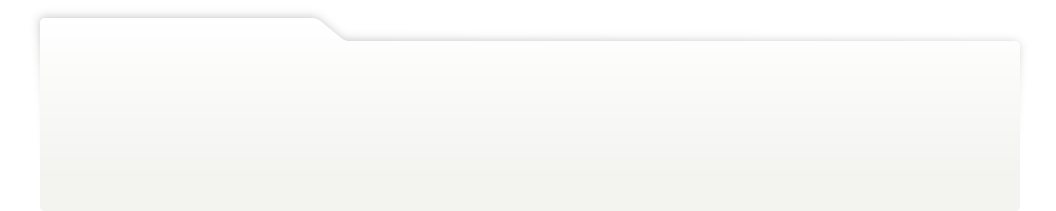
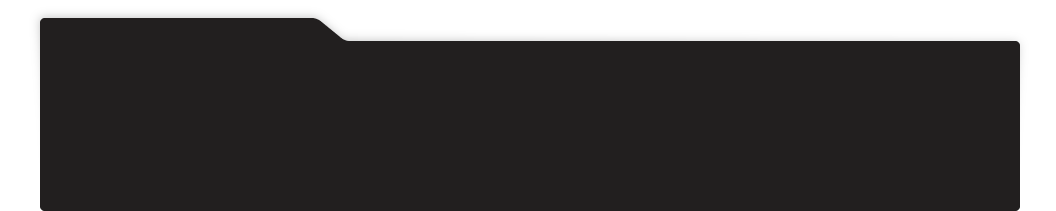
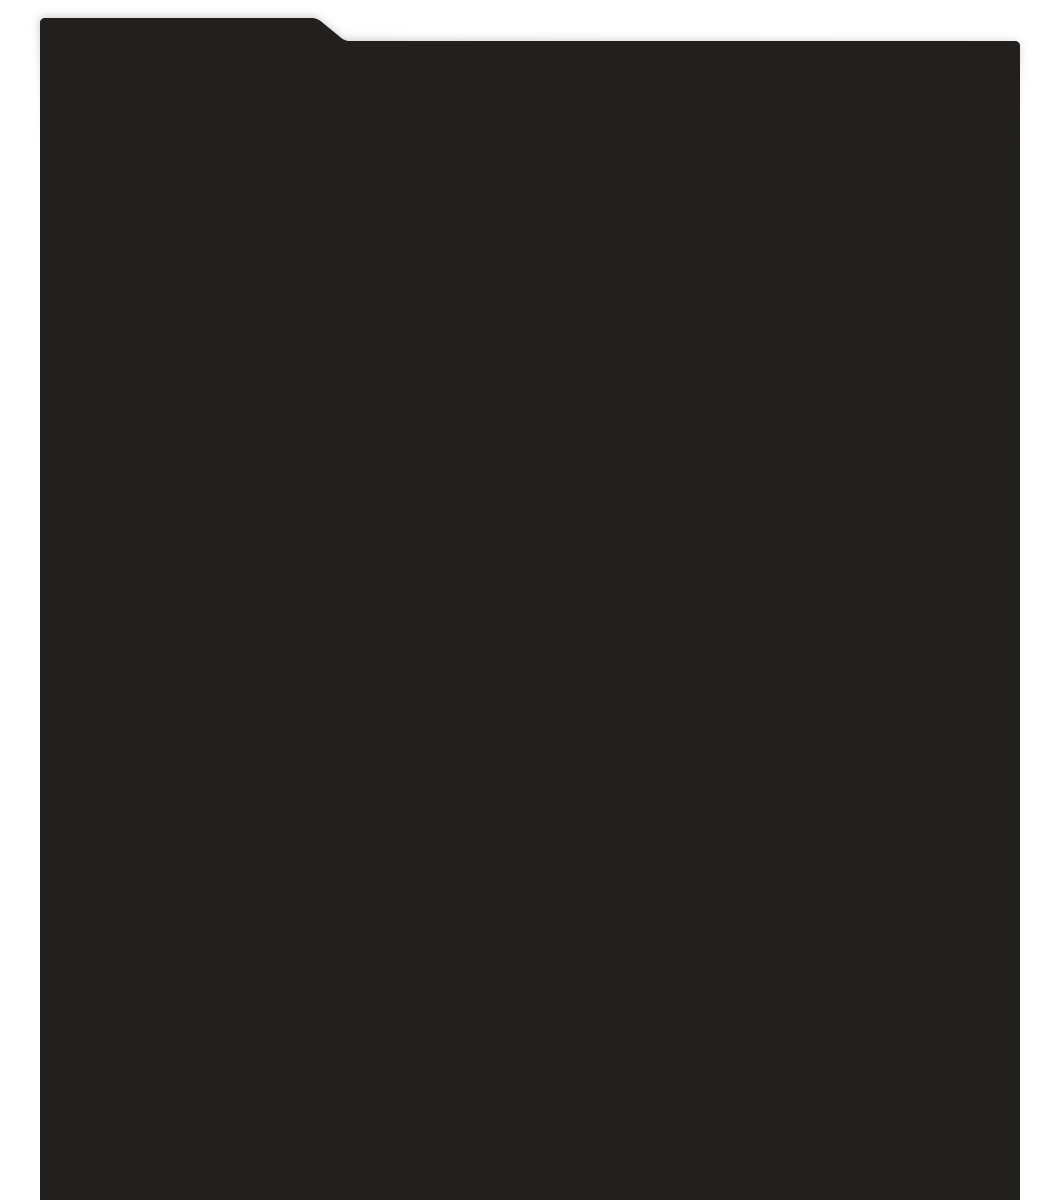
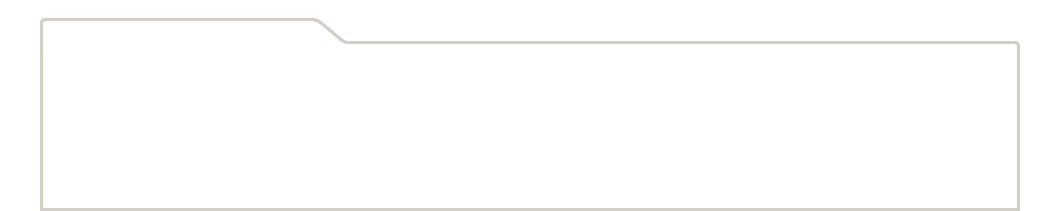
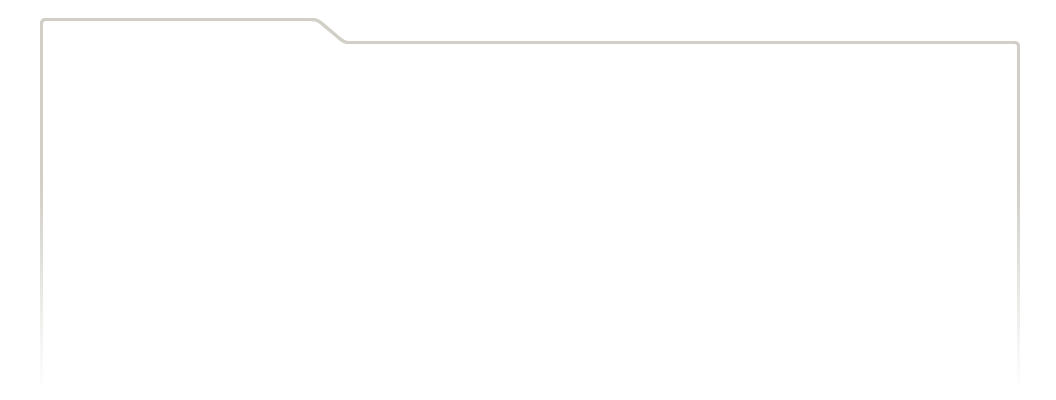
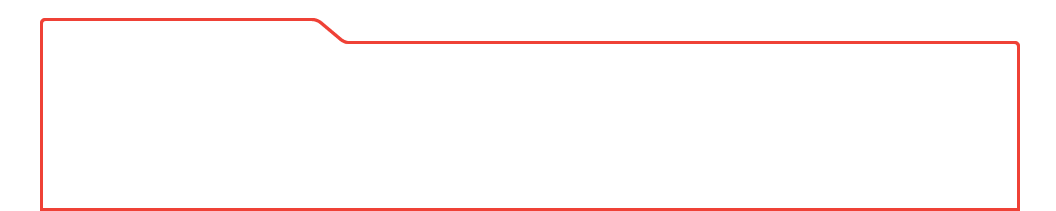
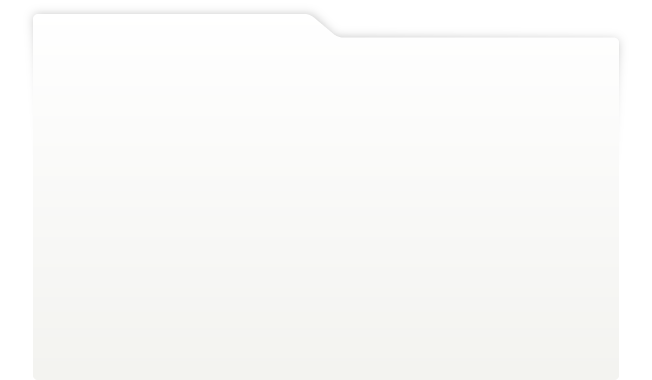
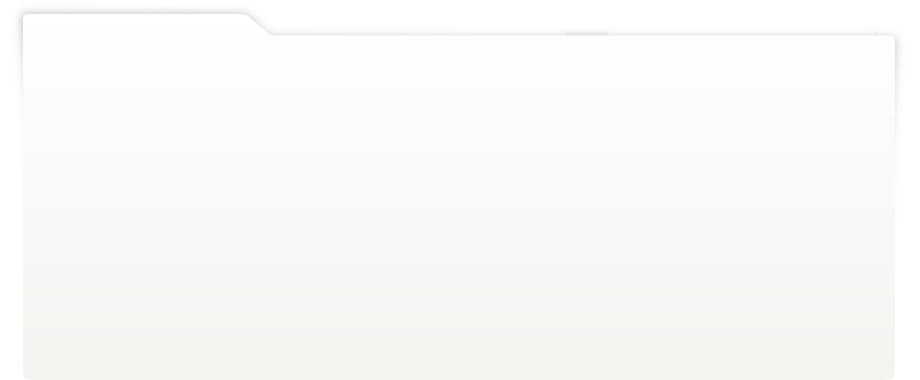
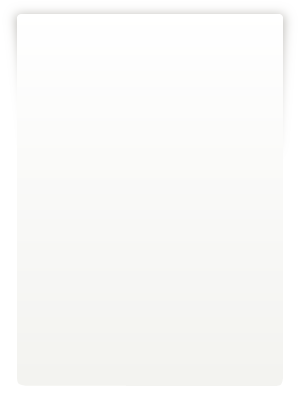
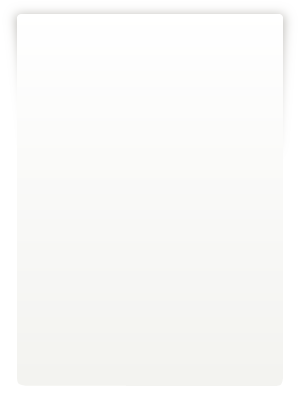
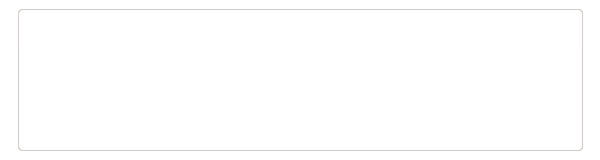
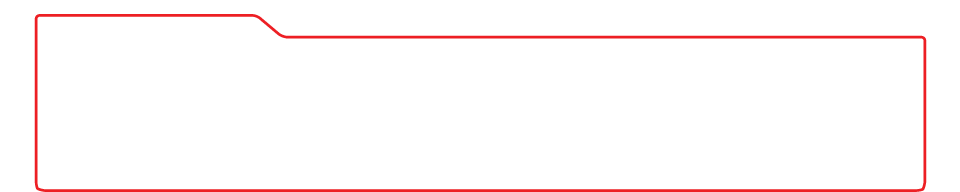
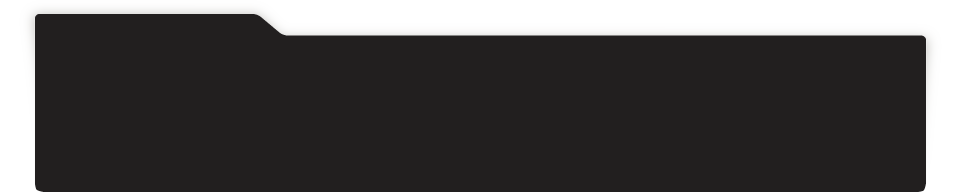
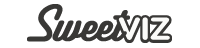
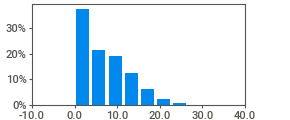
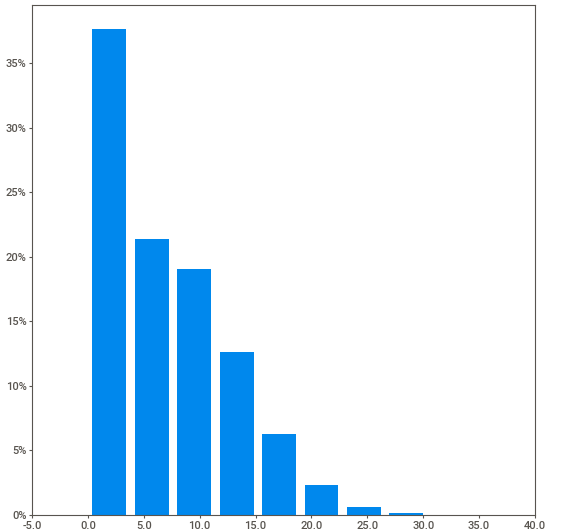
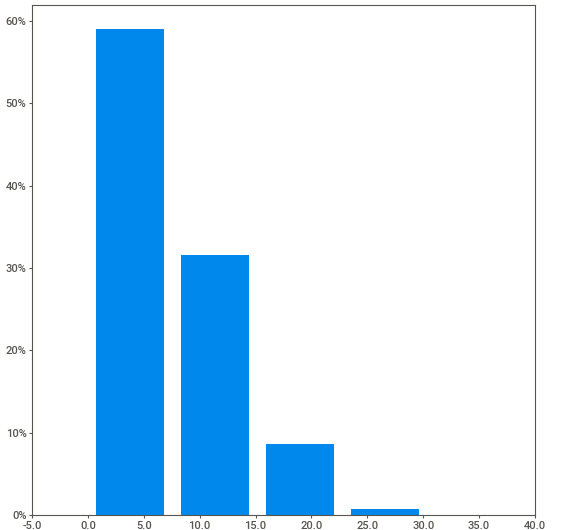
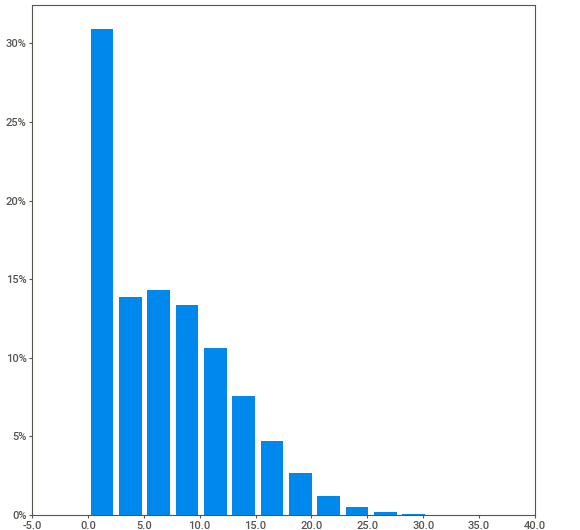
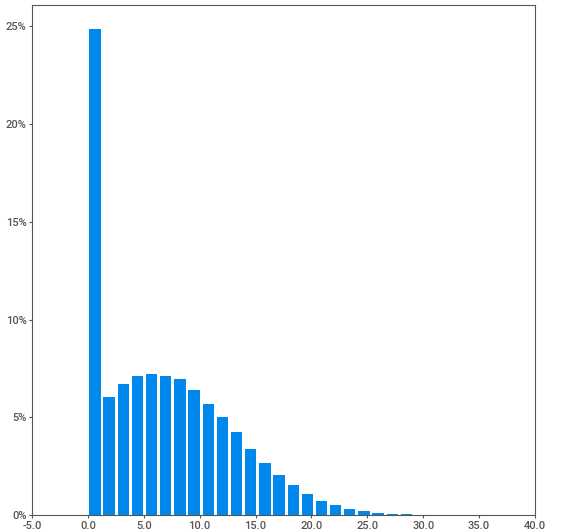
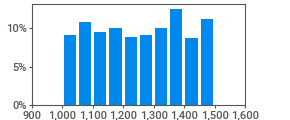
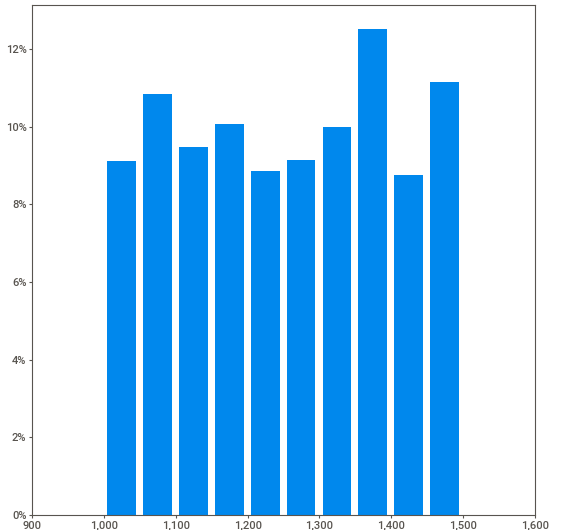
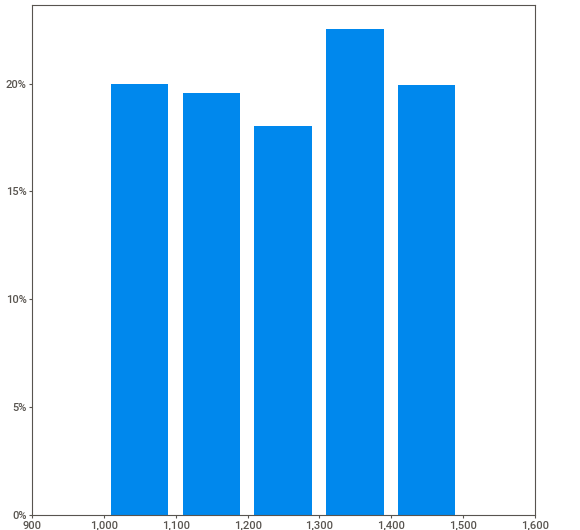
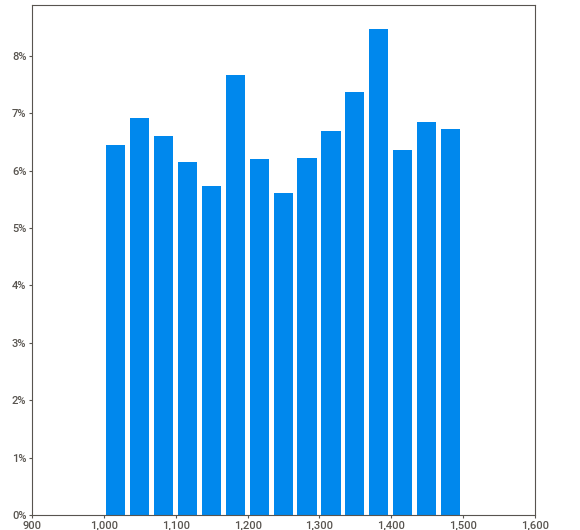
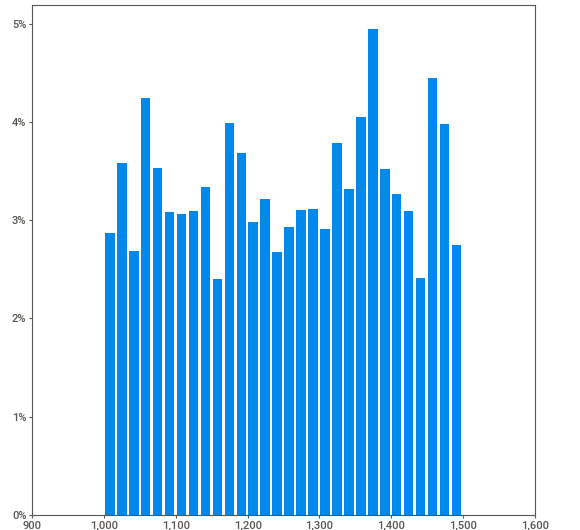
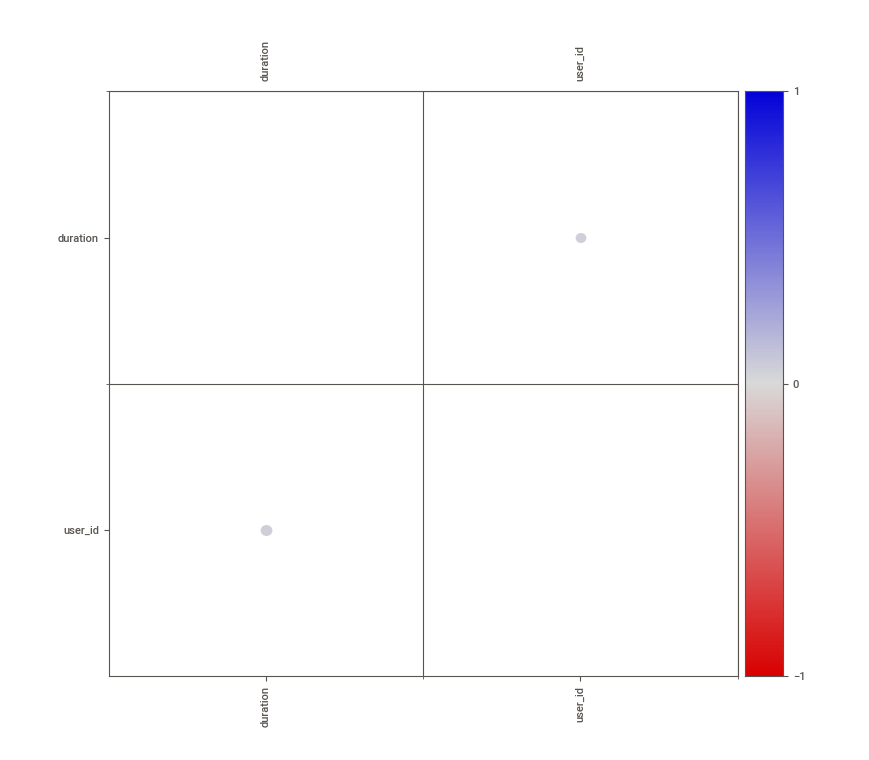
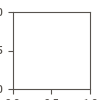

In [8]:
my_report.show_notebook()

* В таблице 202607 строк и 4 столбца 
* С названиями колонок всё в порядке
* Пропущенных значений в данных нет
* Нет никаких аномальных и неправдоподобных значений. Всё в норме
* Дубликатов в таблице нет.


### Таблица messages (информация о сообщениях):

In [9]:
#insert messages data in project
messages = upload_data('1AzjeSmu_gueNyRvC2sPcHUzib-8CtlBGoPMNxIZMa_Q')

messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
#review data info
def data_info(df):
    print(f'Размер таблицы {df.shape}')
    
    df.info()

    print(f'Количество дубликатов {df.duplicated().sum()}')


In [11]:
data_info(messages)

Размер таблицы (123036, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Количество дубликатов 0


Пропущенных значений в таблице нет. Тип данных - object. Не буду выводить статистическую информацию, т.к. здесь нет чисел, которые стоит предварительно анализировать.

### Таблица internet (информация об интернет-сессиях):

In [12]:
#insert internet data in project
internet = upload_data('1vpSU-rNOwOsGtVD1HuxeTS2ZFuktq3j9tzZZaOInoLs')

internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
#review data shape
data_info(internet)

Размер таблицы (149396, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Количество дубликатов 0


В таблице 149396 строк и 5 столбцов. Есть столбец Unnamed: 0 - без названия. Нужно будет привести название этого столбца к требуемому виду.

### Таблица tariffs (информация о тарифах):

In [14]:
#встраиваю сторонний файл с данными tariffs в проект
tariffs = upload_data('1e2eo3BpudPByuKw9fkVT8UTkwKofI_bgzxXWOS29OWk')

tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице всего 2 строчки и 8 столбцов. С названиями столбцов всё в порядке. Пропущенных и дублирующихся значений нет.

#### Вывод

Предварительно можно сказать, что данных для анализа и выполнения необходимых вычислений достаточно. Однако есть столбец без имени и с сомнительными данными. С этим нужно будет поработать. 

## Подготовка данных

#### Приведение данных к нужным типам

Преобразуем все необходимые колонки к типу *datetime*

In [15]:
#transform data to data type datetime
users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d'
)


calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d'
)

messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d'
)

internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d'
)

Добавим в эту таблицу колонки с днями недель, месяцами и годами. Это необходимо для последующих расчётов.

In [16]:
#add column with month number
calls['month'] = calls['call_date'].dt.month

#add column with year number
calls['year'] = calls['call_date'].dt.year

#finding unique yaers in column years
calls['year'].unique()

array([2018], dtype=int64)

Судя по всему, в таблице `calls` представлены данные только за 2018 год. Поэтому при подсчете сделанных звонков, мы можем группировать данные по месяцам.

Добавим в таблицу `messages` колонки с днями месяцами и годами. Это необходимо для последующих расчётов.

In [17]:
#add column with month number
messages['month'] = messages['message_date'].dt.month

#add column with year number
messages['year'] = messages['message_date'].dt.year

#add column with month number
internet['month'] = internet['session_date'].dt.month

#finding unique yaers in column years
messages['year'].unique()

array([2018], dtype=int64)

В таблице `messages` также представлены данные только за 2018 год. Поэтому при подсчете сделанных звонков, мы можем группировать данные по месяцам.

#### Исправления ошибок

В таблице `internet` есть столбец `Unnamed: 0` - без названия. Unnamed: 0 возникает, когда данные сохраняют с указанием индекса pd.DataFrame().to_csv(..., index=column). 

In [18]:
#deleting column Unnamed: 0
internet.drop(['Unnamed: 0'], axis = 1)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


#### Расчёты 

Округлим звонки пользователей до минут в таблице `calls`. Почему важно сделать это до группировки, так как в задании сказано "Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута."

In [19]:
#rounding calls duration
calls['duration'] = calls['duration'].apply(np.ceil)

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут по месяцам и сохраним полученные расчёты в таблице `calls_pivoted`

In [20]:
#create pivot table
calls_pivoted = calls.pivot_table(index=['user_id','month'], 
                                  aggfunc=['count', 'sum'], 
                                   values='duration')

#Переименуем столбцы в этой таблице для удобства восприятия
calls_pivoted.columns = ['count_of_calls', 'spent_minuets'] 


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [21]:
#create pivot table
messages_pivoted = messages.pivot_table(index=['user_id','month'], aggfunc=['count'], values='id')
messages_pivoted.columns = ['sent_messages']
messages_pivoted.head(10)

sent_messages
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

Объединим 2 предыдущие полученные таблицы `messages_pivoted` и `calls_pivoted` в таблицу `calls_and_messages`

In [22]:
#merging tables 'messages_pivoted' & 'messages_pivoted' by columns 'user_id', 'month'
calls_and_messages = calls_pivoted.merge(messages_pivoted, on=['user_id', 'month'], how='left')

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам. <br>
Здесь нужно округлить до Гб, но уже после получения этой таблицы, поскольку у нас тарификация по интернету помесячная и деньги мы списываем по Гб.

In [23]:
#create pivot table
internet_pivoted = internet.pivot_table(index=['user_id','month'], aggfunc=['sum'], values='mb_used')

internet_pivoted.columns = ['spent_traffic']

#convert from megabytes to gigabytes
internet_pivoted['spent_traffic'] = internet_pivoted['spent_traffic'] / 1024

# rounding a number to an integer in spent_traffic column
internet_pivoted['spent_traffic']= internet_pivoted['spent_traffic'].apply(np.ceil)
internet_pivoted.head()

spent_traffic
user_id month               
1000    5                3.0
        6               23.0
        7               14.0
        8               14.0
        9               15.0

Объединим эту таблицу с таблицей `calls_and_messages`

In [24]:
#merging tables
common_info = calls_and_messages.merge(internet_pivoted, on=['user_id', 'month'], how='left')
#transform index user_id to common index
common_info = common_info.reset_index()
common_info.head()

,user_id,month,count_of_calls,spent_minuets,sent_messages,spent_traffic
0,1000,5,22,159.0,22.0,3.0
1,1000,6,43,172.0,60.0,23.0
2,1000,7,47,340.0,75.0,14.0
3,1000,8,52,408.0,81.0,14.0
4,1000,9,58,466.0,57.0,15.0


Узнаем, какой пользователь каким тарифом пользуется. Для этого объединим таблицы `common_info` и `users`

In [25]:
#merging tables of users and common_info
table_with_tariffs =common_info.merge(users, on='user_id')
#deleting unnecessary columns 
table_with_tariffs = table_with_tariffs.drop(['churn_date', 'age', 'first_name', 'last_name', 'reg_date'], axis = 1)
table_with_tariffs.head()

,user_id,month,count_of_calls,spent_minuets,sent_messages,spent_traffic,city,tariff
0,1000,5,22,159.0,22.0,3.0,Краснодар,ultra
1,1000,6,43,172.0,60.0,23.0,Краснодар,ultra
2,1000,7,47,340.0,75.0,14.0,Краснодар,ultra
3,1000,8,52,408.0,81.0,14.0,Краснодар,ultra
4,1000,9,58,466.0,57.0,15.0,Краснодар,ultra


In [26]:
#find out common info about table table_with_tariffs
table_with_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3174 non-null   int64  
 1   month           3174 non-null   int64  
 2   count_of_calls  3174 non-null   int64  
 3   spent_minuets   3174 non-null   float64
 4   sent_messages   2678 non-null   float64
 5   spent_traffic   3163 non-null   float64
 6   city            3174 non-null   object 
 7   tariff          3174 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 223.2+ KB


In [27]:
#select all rows with NaN values in column 'spent_traffic'
table_with_tariffs[table_with_tariffs['spent_traffic'].isna()]

,user_id,month,count_of_calls,spent_minuets,sent_messages,spent_traffic,city,tariff
1697,1273,5,24,220.0,21.0,NaN,Курган,ultra
1698,1273,6,40,230.0,38.0,NaN,Курган,ultra
1699,1273,7,44,253.0,37.0,NaN,Курган,ultra
1700,1273,8,53,253.0,41.0,NaN,Курган,ultra
1701,1273,9,33,223.0,32.0,NaN,Курган,ultra
1702,1273,10,40,315.0,35.0,NaN,Курган,ultra
1703,1273,11,45,272.0,29.0,NaN,Курган,ultra
1704,1273,12,41,260.0,39.0,NaN,Курган,ultra
2358,1377,2,23,179.0,2.0,NaN,Брянск,ultra
2471,1392,2,2,13.0,3.0,NaN,Челябинск,ultra


В столбце `sent_messages` есть NANы. Это произошло от того, что пользователь вообще не посылал смски. В столбце `spent_traffic` аналогичная ситуация. Видимо, пользователь вообще не пользовался интернетом<br> заменим все эти пропущенные значения на 0, для избежания последующих проблем с вычислениями.

In [28]:
#fill the NaN values in the sent_messages column with zeros.
table_with_tariffs['sent_messages'] = table_with_tariffs['sent_messages'].fillna(0)

#fill the NaN values in the spent_traffic column with zeros.
table_with_tariffs['spent_traffic'] = table_with_tariffs['spent_traffic'].fillna(0)

### Подсчёт помесячной выручки с каждого пользователя

Посчитаем для каждого пользователя помесячную выручку. Для этого в сводную таблицу добавим данные по тарифным лимитам. Возьмём эти данные из таблицы `tariffs`. <br>
    Но сначала переименуем столбец tariff в таблице table_with_tariffs на tariff_name, чтобы по этому столбцу мы могли объединить 2 таблицы.

In [29]:
#rename column name
table_with_tariffs.rename(columns = {'tariff' : 'tariff_name'}, inplace = True)

Объединим таблицы `table_with_tariffs` и `tariffs`

In [30]:
#merging tables
data = table_with_tariffs.merge(tariffs, on=['tariff_name'], how='left')
data.head(10)

,user_id,month,count_of_calls,spent_minuets,sent_messages,spent_traffic,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,57,350.0,73.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,43,338.0,58.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,46,333.0,70.0,10.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,59,430.0,0.0,18.0,Москва,smart,50,15360,500,550,200,3,3
9,1001,12,63,414.0,0.0,14.0,Москва,smart,50,15360,500,550,200,3,3


In [31]:
#function counts income
#we count how much minuets/messages/GB the person used in one month
#for that we deduct from spent minuets/messages/GB the limits
#if this the difference is >0 then we multiply the count of extra minuets/messages/GB on tariff rate

def count_income(row):
    spent_minuets = 0
    sent_messages = 0
    spent_internet = 0
    if (row['spent_minuets'] - row['minutes_included']) > 0 :
        spent_minuets = (row['spent_minuets'] - row['minutes_included']) * row['rub_per_minute']
    if (row['sent_messages'] - row['messages_included']) > 0 :
        sent_messages = (row['sent_messages'] - row['messages_included']) * row['rub_per_message']
    if (row['spent_traffic'] - row['mb_per_month_included']) > 0 :
        spent_internet = (row['spent_traffic'] - row['mb_per_month_included']/1024) * row['rub_per_gb']
    income = row['rub_monthly_fee'] + spent_minuets + sent_messages + spent_internet
    return income

In [32]:
#insert new column 'income' with the results of function
data['income'] = data.apply(count_income, axis=1).astype('int')

In [33]:
data.describe()

,user_id,month,count_of_calls,spent_minuets,sent_messages,spent_traffic,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.00000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000
mean,1251.555766,8.311594,63.833333,456.931632,38.081601,17.275992,334.640832,19962.192817,1249.05482,969.470699,185.018904,2.400756,2.400756,1069.344991
std,144.470630,2.910625,32.678036,238.031270,35.621296,7.386162,435.256332,7037.407642,1145.41140,641.430384,22.908228,0.916329,0.916329,616.188389
min,1000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.000000,15360.000000,500.00000,550.000000,150.000000,1.000000,1.000000,550.000000
25%,1126.000000,6.000000,41.000000,290.000000,9.000000,13.000000,50.000000,15360.000000,500.00000,550.000000,150.000000,1.000000,1.000000,550.000000
50%,1254.000000,9.000000,63.000000,447.000000,30.000000,17.000000,50.000000,15360.000000,500.00000,550.000000,200.000000,3.000000,3.000000,679.000000
75%,1378.000000,11.000000,83.000000,592.000000,57.000000,21.000000,1000.000000,30720.000000,3000.00000,1950.000000,200.000000,3.000000,3.000000,1950.000000
max,1499.000000,12.000000,244.000000,1673.000000,224.000000,49.000000,1000.000000,30720.000000,3000.00000,1950.000000,200.000000,3.000000,3.000000,3397.000000


In [34]:
#find minimum of income
data['income'].min()

550

In [35]:
#find maximum of income
data['income'].max()

3397

#### Вывод

Были посчитаны выручки помесячно по каждому пользователю. Видно, что максимальная выручка с одного пользователя составила 3397, а минимальная выручка с одного пользователя составила 550 (человек не привысил рамки доступного тарифа).

## Анализ данных

Найдем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

### Расчёты статистик

In [36]:
#counting mean value, standard deviation, 
data_with_statistics = data.pivot_table(index= 'tariff_name', 
                            values= ['spent_minuets', 'sent_messages', 'spent_traffic'], 
                            aggfunc= ['mean', 'var','std'])
data_with_statistics

mean                                       var  \
            sent_messages spent_minuets spent_traffic sent_messages   
tariff_name                                                           
smart           33.396311    419.062978     16.329735    798.595792   
ultra           49.033649    545.451104     19.487907   2198.733603   

                                                  std                \
            spent_minuets spent_traffic sent_messages spent_minuets   
tariff_name                                                           
smart        35844.189551     33.092396     28.259437    189.325618   
ultra        94203.418396     97.820643     46.890656    306.925754   

                           
            spent_traffic  
tariff_name                
smart            5.752599  
ultra            9.890432

* Пользователи тарифа "smart" в среднем отправляют в 1,5 раза меньше смс, тратят в 1,3 раза меньше минут на звонки и тратят на интернет в 1,2 раза меньше Гигабайт, чем пользователи тарифа "ultra" 
* Стандартные отклонения для пользователей обоих тарифов большие. Это значит, что пользователи очень по-разному расходуют минуты, смс и интрнет.

### Визуализация 

Построим гистограмму распределения потраченных минут для обоих тарифов

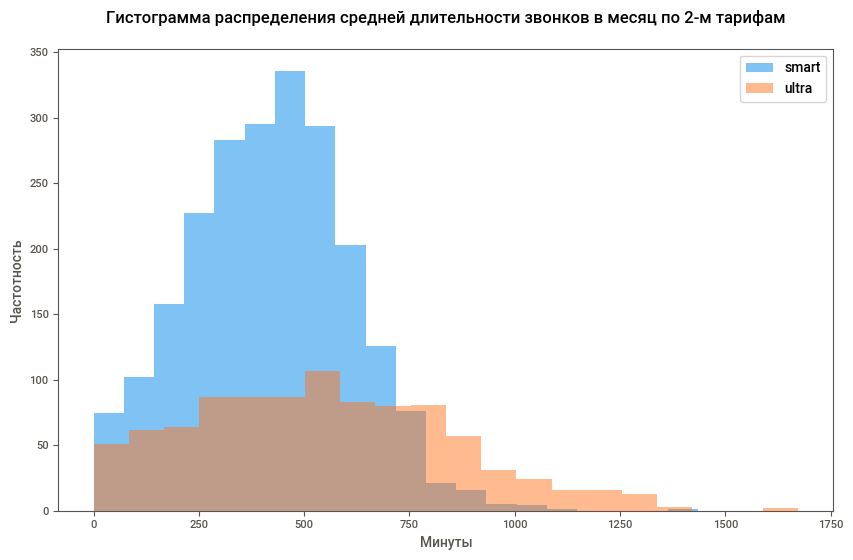

In [37]:
plt.figure(figsize=(10, 6))
data['spent_minuets'][data['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=20)
data['spent_minuets'][data['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=20)
plt.title('Гистограмма распределения средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

plt.show()

Пользователи тарифа smart больше всего тратят 400 минут в месяц. Пользователи тарифа ultra больше всего тратят около 500 минут в месяц<br>
Мало кто из пользователей тарифа smart тратят больше 750 минут в месяц<br>
Мало кто из пользователей тарифа ultra тратят больше 850 минут в месяц

 Построим гистограмму распределения потраченных смс для обоих тарифов

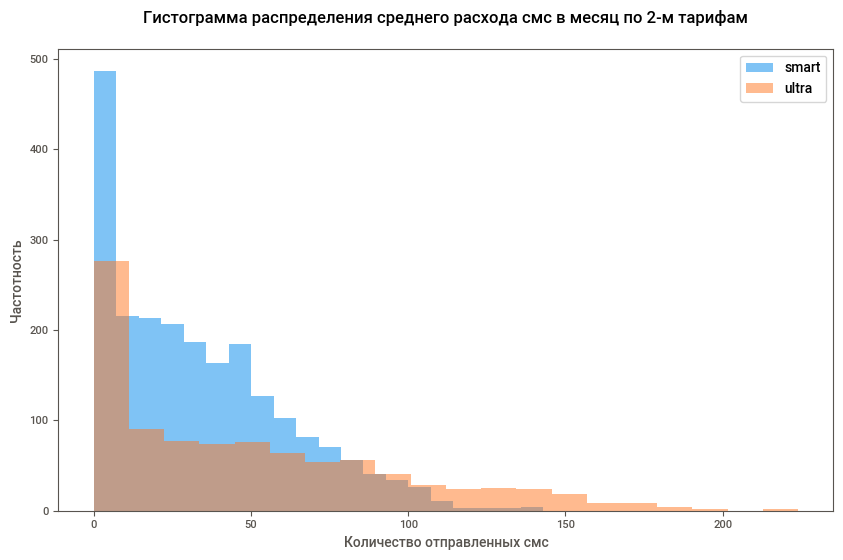

In [38]:
plt.figure(figsize=(10, 6))
data['sent_messages'][data['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=20)
data['sent_messages'][data['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=20)
plt.title('Гистограмма распределения среднего расхода смс в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Количество отправленных смс')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

plt.show()

Пользователи обоих тарифов в среднем вообще не отправляют смски. <br>
Пользователи тарифа smart в 2 раза реже отправляют от 10 до 50 смсок в мексяц. Ещё реже отправляют от 55 до 100 смсок. Эти пользователи практически не отправляют больше 105 смсок в месяц. <br>
Пользователи тарифа ultra в 3 раза реже отправляют от 15 до 90 смсок в месяц. Эти пользователи практически не отправляют больше 155 смсок в месяц.

Построим гистограмму распределения потраченных гигабайт для обоих тарифов

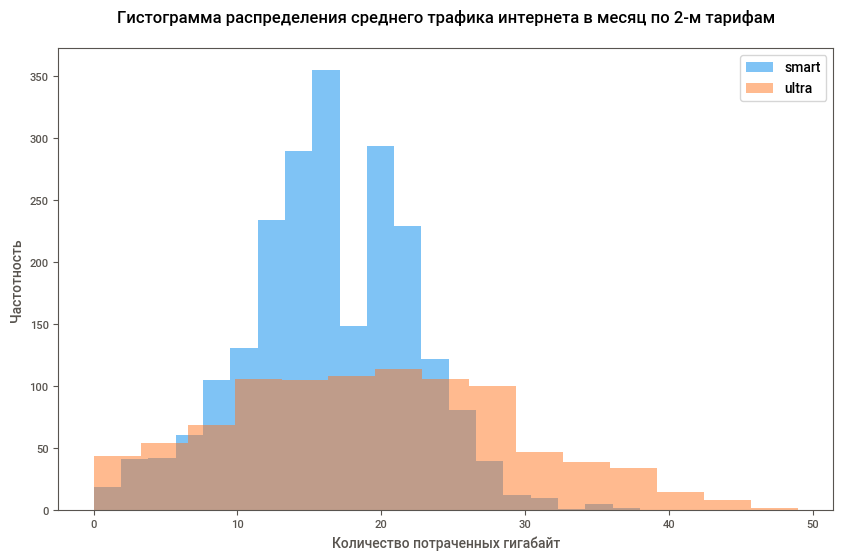

In [39]:
plt.figure(figsize=(10, 6))
data['spent_traffic'][data['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=20)
data['spent_traffic'][data['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего трафика интернета в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Количество потраченных гигабайт')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

plt.show()

Пользователи тарифа smart в среднем тратят на интернет около 16 Гб в месяц. Мало кто из этих пользователей тратит до 6 Гб и от 23 Гб в месяц. <br>
Пользователи тарифа ultra больше всего тратят в среднем от 10 до 28 Гб в месяц. Эти клиенты практически не тратят более 39 Гб трафика в месяц

#### Вывод

В среднем пользователи тарифа smart по всем метрикам (смс, звонки и нинтернет) тратят больше, чем пользователи тарифа ultra. По представленным гистограммам видно, что пользователей тарифа smart у "Мегалайн" в разы (2-3 раза) больше, чем пользователей тарифа ultra.<br>
    Кроме того, для пользователей обоих тарифов практически не важны смски. Потому что они их в большинстве своем даже не отправляют.

## Проверка гипотезы

**Нулевая гипотеза:** средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

**Альтернативная гипотеза:** средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Выберем пользователей тарифа "Ультра".

In [40]:
#select users of ultra tariff
ultra_users = data.query('tariff_name == "ultra"')

Проверяем, как распределены данные по выручке с этих пользователей.

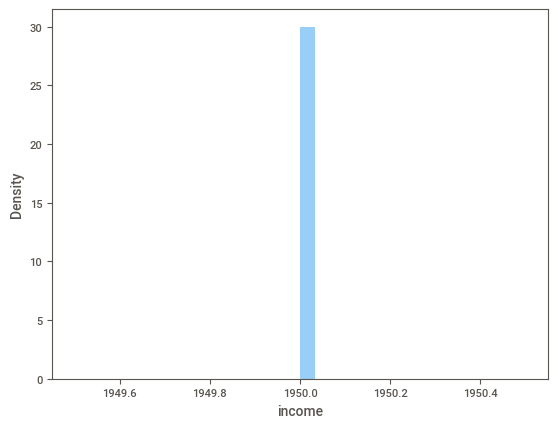

In [56]:
sns.distplot(ultra_users['income'])
plt.ticklabel_format(useOffset=False)
plt.show()

Похоже, что все значения дохода для пользователй этого тарифа сводятся к 1950

Выберем пользователей тарифа "Смарт".

In [42]:
#select users of smart tariff
smart_users = data.query('tariff_name == "smart"')

Проверяем, как распределены данные по выручке с этих пользователей.

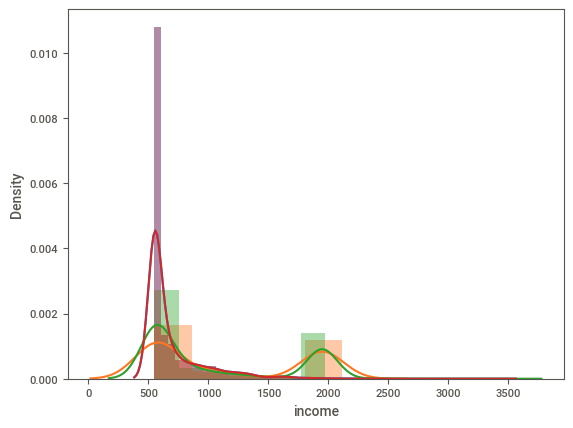

In [52]:
sns.distplot(smart_users['income'])
plt.show()

Распределение нормальное несимметричное.

Для предложенных выше гипотез посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.<br>
Уровень значимости:  𝛼=0.05<br>
Если p-value будет меньше выбранного уровня значимости  𝛼=0.05 , то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Зададим equal_var = False, потому что выборки разные по размерам

In [44]:
alpha = .05 #critical level of statistical significance

results = st.ttest_ind(
    ultra_users['income'], 
    smart_users['income'],
    equal_var = False)

print('p-значение:', '{:f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.000000
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность различия выручек для пользователей разных тарифов почти 0%.

**Нулевая гипотеза:** средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Альтернативная гипотеза:** средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Выделим сегмент пользователей из Москвы.

In [45]:
#choosing users from Moscow
moscow_users = data.query('city == "Москва"')

Проверим распределение выручки для пользователей Москвы

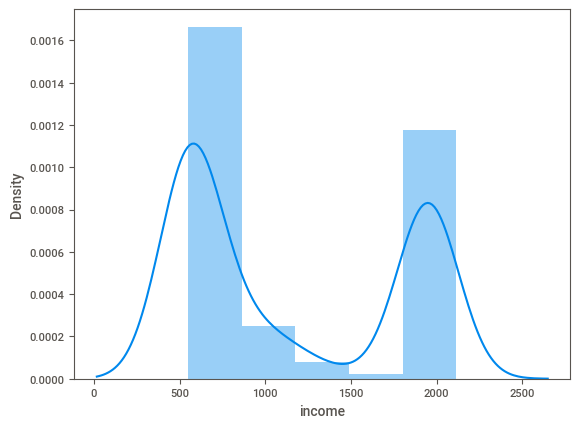

In [59]:
sns.distplot(moscow_users['income'])
plt.show()

Бимодальное распределение

Выделим сегмент пользователей из других городов

In [57]:
#choosing users not from Moscow
users_not_from_moscow = data.query('city != "Москва"')


Проверим распределение выручки для пользователей не из Москвы

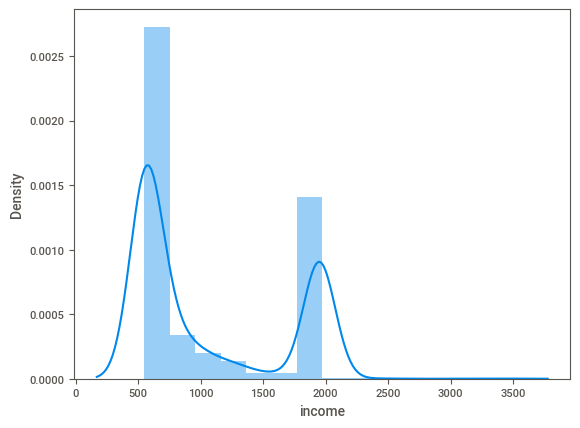

In [58]:
sns.distplot(users_not_from_moscow['income'])
plt.show()

Бимодальное распределение.

В связи с тем, что распределение величин выручек очень сильно отличается от нормального, воспользуемся непараметрическим тестом Манна-Уитни<br>
Уровень значимости: 𝛼=0.05
Если p-value будет меньше выбранного уровня значимости 𝛼=0.05 , то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [49]:
results_cities = st.mannwhitneyu(users_not_from_moscow['income'], moscow_users['income'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results_cities.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0
Отвергаем нулевую гипотезу


p-значение больше меньше 0,05. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Мы не выходим за пределы альфа, то есть за порог необычности в случайной модели нулевой гипотезы.

Проверим, у каких пользователей выручка больше

In [50]:
users_not_from_moscow['income'].mean()

1050.9785491419657

In [51]:
moscow_users['income'].mean()

1146.544262295082

Выручка пользователей из данной выборки из Москвы больше.

#### Вывод

В результате проверки гипотез было выяснено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются. <br>
А средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов в большую сторону.

## Общий вывод

* В представленной выборке данные о 500 пользователях "Мегалайна" со всей страны. 99 пользователей из Москвы, все остальные из других регионов России. Пользователи "Мегалайна" - это люди от 18 до 75 лет, средний возраст клиента 47 лет.<br>
* Среди пользователей "Мегалайна" есть люди, которые не пользуются вообще мобильным интернетом. Это люди не из Москвы, а в большинстве из Кургана и по 1 человеку из Челябинска, Липецка и Брянска. <br>
* Известно, что стоимость помесячной оплаты за тарифы "Смарт" и "Ультра" отличаются почти в 4 раза ("Ультра" дороже). Цена на тарифы определяет, сколько бесплатных минут, смс и мегабайт интернета даётся пользователю конкретного тарифа. Чем дороже тариф, тем больше минут, смс и мегабайт выдаётся пользователю <br>

* Максимальный доход с одного пользователя составляет 3397. Такой большой доход выходит благодаря тому, что пользователь превышает установленные нормы для тарифа. Минимальный доход с одного пользователя 550 - это минимальная плата за месяц для тарифа "Смарт". Средний доход от одного пользователя 1070.<br>
* Пользователи тарифа "Смарт" в среднем тратят меньше смс, минут и Гигабайт, чем пользователи тарифа "Ультра". Это может быть обусловлено обозначенными оператором лимитами тарифов.<br>
* Пользователи тарифа "Смарт" в среднем тратят 33 смс, 419 минут и 16 Гб в месяц. Пользователи тарифа "Ультра" в среднем тратят 49 смс, 545 минут и 20 Гб в месяц.<br>
* Средние расходны смс для большинства пользователей обоих тарифов составляет 0. Это значит, что услуга отправки смс не пользуется большой популярностью.<br>
* У "Мегалайн" большинство клиентов пользуются тарифом "Смарт". Это возможно обусловлено более првлекательной ценой. <br>
* Средние выручки "Мегалайн" от пользователей обоих тарифов примерно равны для данной конкретной выборки. Это может быть обусловлено тем, что пользователей тарифа "Смарт" больше, но цену, которую они платят за пользование услугами оператора, меньше. В то же время пользователей тарифа "Ультра" меньшинство, но они приносят компании намного больший доход. <br>
* Средняя выручка пользователей из Москвы больше, чем от пользоватлей из регионов (хотя в Москве всего лишь 1/5 часть от общего количества клиентов). Это тоже может быть связано с тем. что столичные клиенты предпочитают не скупиться на траты на мобильного оператора.